In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
hc_kB = 0.0143877735

def planck(l, t):
    return 1. / l**5.0 * 1. / (np.exp(hc_kB / (l * t)) - 1)

In [4]:
data = np.loadtxt('lin2012xyz10e_fine_7sf.csv', delimiter=',')

In [5]:
wavelength_nm = data[:,0]
wavelength = wavelength_nm * 10**-9
s1 = data[:,1]
s2 = data[:,2]
s3 = data[:,3]
print("min wavelength:", wavelength_nm[0])
print("max wavelength:", wavelength_nm[-1])

min wavelength: 390.0
max wavelength: 830.0


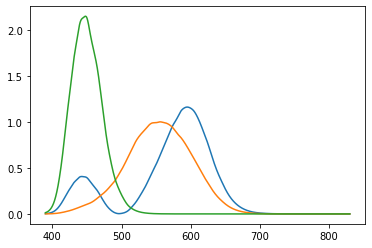

In [6]:
plt.plot(wavelength_nm, s1)
plt.plot(wavelength_nm, s2)
plt.plot(wavelength_nm, s3)

<ipython-input-3-0904efcaeba5>:4: RuntimeWarning: divide by zero encountered in double_scalars
  return 1. / l**5.0 * 1. / (np.exp(hc_kB / (l * t)) - 1)
<ipython-input-3-0904efcaeba5>:4: RuntimeWarning: invalid value encountered in double_scalars
  return 1. / l**5.0 * 1. / (np.exp(hc_kB / (l * t)) - 1)
<ipython-input-3-0904efcaeba5>:4: RuntimeWarning: overflow encountered in exp
  return 1. / l**5.0 * 1. / (np.exp(hc_kB / (l * t)) - 1)


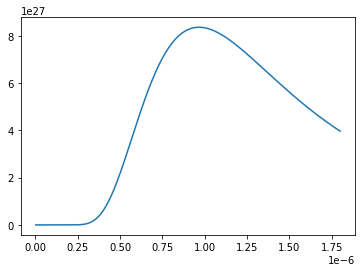

In [7]:
l = np.linspace(0, 1800e-9, 1001)
p = np.array([planck(ll, 3000.) for ll in l])
plt.plot(l, p)

In [8]:
def planck_spectrum(t):
    return np.array([planck(l * 10**-9, t) for l in wavelength_nm])

In [9]:
def sense_vector(spectrum):
    """Returns the expected sensory-perception vector corresponding to the normalized (and relative)
    amounts of signal received on the L(ong), M(edium), and S(hort) wavelength color receptors
    according to the 10-deg XYZ CMFs transformed from the CIE (2006) 2-deg LMS cone fundamentals
    with a 0.1nm spacing from: http://cvrl.ioo.ucl.ac.uk/cmfs.htm"""
    s = np.matrix([np.sum(s1 * spectrum), np.sum(s2 * spectrum), np.sum(s3 * spectrum)]).T
    return s / np.max(s)

In [10]:
temps = [2800, 3600, 4400, 5200]
for t in temps:
    print(str(t) + "K:", sense_vector(planck_spectrum(t)).T)

2800K: [[1.         0.88854827 0.29811608]]
3600K: [[1.         0.95723777 0.51997556]]
4400K: [[1.         0.99626219 0.72999208]]
5200K: [[0.98219771 1.         0.89702919]]


In [11]:
def s_lookup(num, wl):
    """num = 1, 2, 3 (corresponds to L(ong), M(edium), S(hort) wavelength receptors)
    wl (wavelength) should be in meters."""
    # wl should be between min(wl) and max(wl)
    if num == 1:
        s = s1
    elif num == 2:
        s = s2
    elif num == 3:
        s = s3
    return s[np.argmin((wavelength - wl)**2.0)]

def rgb_composition(l1, l2, l3, sv):
    """Finds relative intensities required with lamps at l1, l2, and l3 in wavelength (meters) space to match
    the sense vector (sv) provided in the arguments.
    
    Note: sv should be a 3x1 column matrix (same format produced by sense_vector function),
    and l1, l2, l3 should have units of meters."""
    s_mat = np.matrix([[s_lookup(1, l1), s_lookup(1, l2), s_lookup(1, l3)],
                       [s_lookup(2, l1), s_lookup(2, l2), s_lookup(2, l3)],
                       [s_lookup(3, l1), s_lookup(3, l2), s_lookup(3, l3)]])
    c_mat = s_mat.I * sv
    return c_mat / np.max(c_mat)

In [12]:
rgb_composition(630e-9, 530e-9, 475e-9, sense_vector(planck_spectrum(1800)))

matrix([[1.        ],
        [0.26544983],
        [0.04581015]])